# Machine Learning

## Predicting the Stock Market with TensorFlow
This model will predict the _next_ price of the stock market.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Create Dataframe

In [65]:
df = pd.read_csv("../datasets/dow_jones.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-05-14,10620.16,10780.68,10780.68,10509.89,256.50,-1.51
1,2010-05-17,10625.83,10616.98,10707.30,10424.72,221.91,0.05
2,2010-05-18,10510.95,10625.45,10760.05,10463.15,246.37,-1.08
3,2010-05-19,10444.37,10505.70,10558.56,10306.22,266.34,-0.63
4,2010-05-20,10068.01,10440.21,10440.21,10042.46,360.35,-3.60


## Clean Dataframe

### Create Datetime Objects

In [66]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-05-14,10620.16,10780.68,10780.68,10509.89,256.50,-1.51
1,2010-05-17,10625.83,10616.98,10707.30,10424.72,221.91,0.05
2,2010-05-18,10510.95,10625.45,10760.05,10463.15,246.37,-1.08
3,2010-05-19,10444.37,10505.70,10558.56,10306.22,266.34,-0.63
4,2010-05-20,10068.01,10440.21,10440.21,10042.46,360.35,-3.60


## Mark Features and Create Target


In [67]:
feature_labels = ["Price", "Open", "High", "Low", "Vol.", "Change %"]
df["Target"] = df["Price"].shift(-1)
df = df.dropna()

features = df[feature_labels]
target = df["Target"]

## Fitting the Data Between 0 and 1

In [68]:
feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features)

target_scaler = MinMaxScaler()
target = target.values.reshape(-1, 1)
target_scaled = target_scaler.fit_transform(target)

## Split Between Train and Test Sets

In [69]:
features_train, features_test, target_train, target_test = train_test_split(features_scaled, target_scaled, test_size=0.2, shuffle=False)

## Creating a Neural Network Model

In [70]:
model = Sequential([
    Input(shape=(features_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

## Compile the Model

In [71]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [72]:
trained_model = model.fit(features_train, target_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0300 - mae: 0.1268 - val_loss: 0.0019 - val_mae: 0.0366
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.1095e-04 - mae: 0.0113 - val_loss: 0.0017 - val_mae: 0.0354
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.2174e-04 - mae: 0.0084 - val_loss: 0.0013 - val_mae: 0.0310
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.0076e-04 - mae: 0.0078 - val_loss: 0.0011 - val_mae: 0.0281
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.2994e-05 - mae: 0.0071 - val_loss: 0.0010 - val_mae: 0.0277
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.6928e-05 - mae: 0.0067 - val_loss: 5.3339e-04 - val_mae: 0.0187
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6281e-05 - mae: 0.0061 - val_loss: 6.2377e-04 - val_mae: 0.0206
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.3629e-05 - mae: 0.0058 - val_loss: 5.0258e-04 - val_mae: 0.0181
Epoch 9/15
49/49 ━━━━━━━

## Analyze Model's Performance

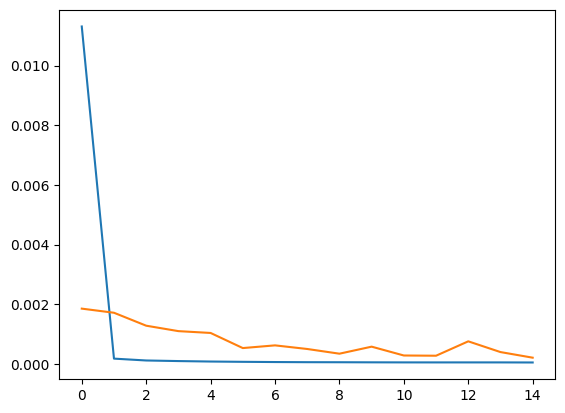

In [73]:
plt.plot(trained_model.history['loss'], label='Train Loss')
plt.plot(trained_model.history['val_loss'], label='Val Loss')

## Make a Prediction with Machine Learning

In [74]:
last_record = features_scaled[-1].reshape(1, -1)
predicted_price = model.predict(last_record)[0][0]
predicted_price = target_scaler.inverse_transform([[predicted_price]])[0][0]
print(f"Predicted Price: ${predicted_price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
Predicted Price: 27554.701777716873
